In [57]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Reading the dataset to dataframe
# Dropping the InvoiceID column
df = pd.read_csv('supermarket-sales-data.csv')
df.drop(columns = ['InvoiceID'], axis = 1, inplace = True)
df.head()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [29]:
df['Branch'].unique(), df['Branch'].value_counts()

(array(['A', 'C', 'B'], dtype=object),
 Branch
 A    340
 B    332
 C    328
 Name: count, dtype: int64)

In [30]:
df['CustomerType'].unique(), df['CustomerType'].value_counts()

(array(['Member', 'Normal'], dtype=object),
 CustomerType
 Member    501
 Normal    499
 Name: count, dtype: int64)

In [31]:
df['ProductType'].unique(), df['ProductType'].value_counts()

(array(['Health and beauty', 'Electronic accessories',
        'Home and lifestyle', 'Sports and travel', 'Food and beverages',
        'Fashion accessories'], dtype=object),
 ProductType
 Fashion accessories       178
 Food and beverages        174
 Electronic accessories    170
 Sports and travel         166
 Home and lifestyle        160
 Health and beauty         152
 Name: count, dtype: int64)

In [32]:
df['PaymentType'].unique(), df['PaymentType'].value_counts()

(array(['UPI', 'Cash', 'Credit card'], dtype=object),
 PaymentType
 UPI            345
 Cash           344
 Credit card    311
 Name: count, dtype: int64)

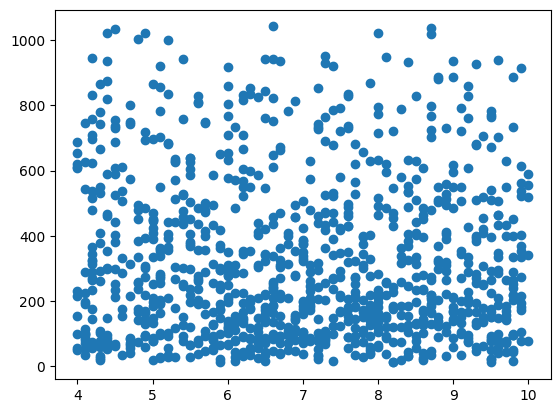

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df['Rating'], df['Total'])

#### For Gender

In [33]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())

In [34]:
df_gender = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9,2]]] , axis = 1)
df_gender.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating,Gender
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1,Female
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6,Female
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4,Male
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4,Male
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3,Male


In [35]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_gender.iloc[:,:-1], df_gender.iloc[:,-1], test_size=0.3, random_state=680)

In [36]:
# GridSearch Decision Tree Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf1 = DecisionTreeClassifier(random_state = 1)
params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10]
}
newclf1 = GridSearchCV(clf1, params, cv=5, n_jobs=-1)
newclf1.fit(X_train, y_train)
y_pred = newclf1.predict(X_test)
newconfmat = confusion_matrix(y_test, y_pred)
print(newclf1.best_params_,'\n')
print(f'Confusion Matrix:\n{newconfmat}\n')

tn, fp, fn, tp = newconfmat.ravel()
precision1 = round(tp/(tp+fp),3)
recall1 = round(tp/(tp+fn),3)
accuracy1= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy1}\nPrecision : {precision1}\nRecall : {recall1}')

{'criterion': 'gini', 'max_depth': 10} 

Confusion Matrix:
[[65 90]
 [51 94]]

Overall accuracy: 0.53
Precision : 0.511
Recall : 0.648


In [40]:
# GridSearch Random Forest Model
# TN is {0,0}, FN is {1,0}, TP {1,1} and FP {0,1}

clf2 = RandomForestClassifier(random_state = 680)
params = {
    'n_estimators':[50,100,200,500],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None]
}
newclf2 = GridSearchCV(clf2, params, cv=5, n_jobs=-1)
newclf2.fit(X_train, y_train)
y_pred = newclf2.predict(X_test)
newconfmat = confusion_matrix(y_test, y_pred)
print(newclf2.best_params_,'\n')
print(f'Confusion Matrix:\n{newconfmat}\n')

tn, fp, fn, tp = newconfmat.ravel()
precision2 = round(tp/(tp+fp),3)
recall2 = round(tp/(tp+fn),3)
accuracy2= round((tp+tn)/(tp+tn+fp+fn),3)
print(f'Overall accuracy: {accuracy2}\nPrecision : {precision2}\nRecall : {recall2}')

{'criterion': 'entropy', 'max_features': None, 'n_estimators': 200} 

Confusion Matrix:
[[71 84]
 [62 83]]

Overall accuracy: 0.513
Precision : 0.497
Recall : 0.572


In [41]:
data1 = [['DecisionTreeClassifier', newclf1.best_params_, accuracy1, precision1, recall1],
        ['RandomForestClassifier', newclf2.best_params_, accuracy2, precision2, recall2]]

In [42]:
report1 = pd.DataFrame(data1, columns= ['Model', 'Parameters', 'Overall accuracy', 'Precision', 'Recall'])
report1

,Model,Parameters,Overall accuracy,Precision,Recall
0,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 10}",0.530,0.511,0.648
1,RandomForestClassifier,"{'criterion': 'entropy', 'max_features': None,...",0.513,0.497,0.572


#### For Rating

In [63]:
temp = df.copy()
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(temp.iloc[:,[0,1,2,3,8]])
ohe_df = pd.DataFrame(data = X_ohe, columns=ohe.get_feature_names_out())
df_rating = pd.concat([ohe_df, temp.iloc[:,[4,5,6,7,9]]] , axis = 1)
df_rating.head()

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,Gender_Female,Gender_Male,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,...,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI,UnitPrice,Quantity,Tax,Total,Rating
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,74.69,7,26.1415,548.9715,9.1
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,9.6
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,46.33,7,16.2155,340.5255,7.4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,58.22,8,23.2880,489.0480,8.4
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,86.31,7,30.2085,634.3785,5.3


In [64]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_rating.iloc[:,:-1], df_rating.iloc[:,-1], test_size=0.3, random_state=680)

In [65]:
# GridSearch Decision Tree Model

reg1 = DecisionTreeRegressor(random_state = 1)
params = {
    'criterion':['squared_error', 'absolute_error', 'poisson'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}
newreg1 = GridSearchCV(reg1, params, cv=5, n_jobs=-1)
newreg1.fit(X_train, y_train)
y_pred = newreg1.predict(X_test)
mae1 = round(mean_absolute_error(y_test, y_pred),3)
print(newreg1.best_params_,'\n')
print(f'Mean Absolute Error: {mae1}\n')

{'criterion': 'squared_error', 'max_depth': 1} 

Mean Absolute Error: 1.516



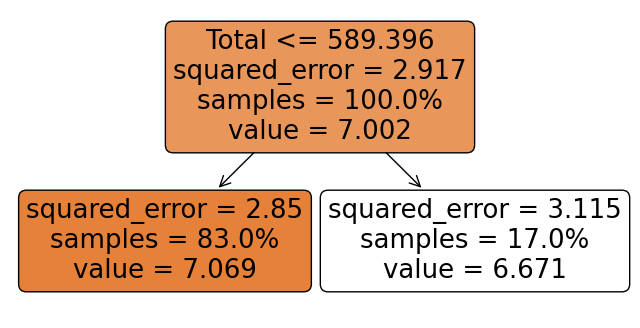

In [66]:
fig = plt.figure(figsize=(8, 4))
_ = tree.plot_tree(
    newreg1.best_estimator_,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    proportion=True,
)

In [67]:
# Default Linear Regression Model

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
mae2 = round(mean_absolute_error(y_test, y_pred),3)
print(f'Mean Absolute Error: {mae2}\n')

Mean Absolute Error: 1.526



In [68]:
data2 = [['DecisionTreeRegressor', newreg1.best_params_, mae1],['LinearRegression', 'Default', mae2]]

In [69]:
report2 = pd.DataFrame(data2, columns= ['Model', 'Parameters', 'MAE'])
report2

,Model,Parameters,MAE
0,DecisionTreeRegressor,"{'criterion': 'squared_error', 'max_depth': 1}",1.516
1,LinearRegression,Default,1.526
